In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

Using TensorFlow backend.
D:\d\softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\d\softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\d\softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\d\softwares\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [2]:
df = pd.read_csv('imdb_master.csv', encoding='latin-1')
print(df.head())

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [3]:
sentences = df['review'].values
y = df['label'].values

In [4]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [5]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [6]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
input_dim=np.prod(X_train.shape[1:]) # defining input_dim
# Number of features
print(input_dim)

2000


In [7]:
model = Sequential()
model.add(layers.Dense(300,input_dim= input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax')) #changing number of neuron to 3 as we have only two labels Pos and Neg and Sup
                                                 #The activation layer is set to softmax as it works best for the multi class classification
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)


Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 8s 109us/step - loss: 0.8809 - acc: 0.5032 - val_loss: 0.8417 - val_acc: 0.5167
Epoch 2/5
75000/75000 [==============================] - 8s 102us/step - loss: 0.7898 - acc: 0.5778 - val_loss: 0.8462 - val_acc: 0.5126
Epoch 3/5
75000/75000 [==============================] - 8s 108us/step - loss: 0.6813 - acc: 0.6853 - val_loss: 0.8757 - val_acc: 0.5089
Epoch 4/5
75000/75000 [==============================] - 7s 99us/step - loss: 0.4854 - acc: 0.8221 - val_loss: 0.9584 - val_acc: 0.5101
Epoch 5/5
75000/75000 [==============================] - 8s 103us/step - loss: 0.2763 - acc: 0.9313 - val_loss: 1.0735 - val_acc: 0.5050


In [8]:
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

25000/25000 [==============================] - 1s 45us/step
Evaluation result on Test Data : Loss = 1.073532747116089, accuracy = 0.5049600005149841


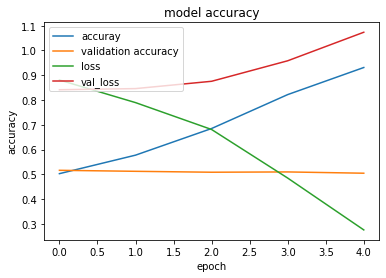

In [9]:
# plotting loss and accuracy using history obj
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [10]:
# Adding Embedding layer to the model 
from keras.layers import Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences

sentences = df['review']

In [11]:
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

model1 = Sequential()
model1.add(Embedding(vocab_size, 50, input_length=max_review_len))
model1.add(Flatten())
model1.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model1.add(layers.Dense(3, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=model1.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 361s 5ms/step - loss: 1.0719 - acc: 0.4937 - val_loss: 0.8676 - val_acc: 0.4964
Epoch 2/5
75000/75000 [==============================] - 377s 5ms/step - loss: 0.8446 - acc: 0.5125 - val_loss: 0.8476 - val_acc: 0.5003
Epoch 3/5
75000/75000 [==============================] - 358s 5ms/step - loss: 0.8092 - acc: 0.5314 - val_loss: 0.8418 - val_acc: 0.4992
Epoch 4/5
75000/75000 [==============================] - 381s 5ms/step - loss: 0.7680 - acc: 0.5684 - val_loss: 0.8495 - val_acc: 0.5010
Epoch 5/5
75000/75000 [==============================] - 398s 5ms/step - loss: 0.6947 - acc: 0.6361 - val_loss: 0.9156 - val_acc: 0.4954


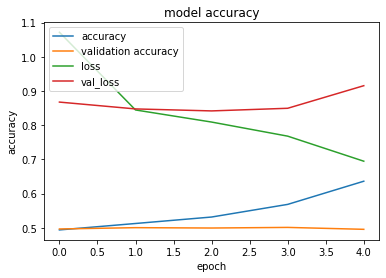

In [13]:
# plotting loss and accuracy using history obj
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [14]:
# Applying the same for 20news data 
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences = newsgroups_train.data
y = newsgroups_train.target

max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

model2 = Sequential()
model2.add(Embedding(vocab_size, 50, input_length=max_review_len))
model2.add(Flatten())
model2.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model2.add(layers.Dense(20, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
historynew=model2.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 8485 samples, validate on 2829 samples
Epoch 1/5
8485/8485 [==============================] - 294s 35ms/step - loss: 11.1785 - acc: 0.0570 - val_loss: 3.2005 - val_acc: 0.0505
Epoch 2/5
8485/8485 [==============================] - 260s 31ms/step - loss: 3.0229 - acc: 0.0687 - val_loss: 2.9595 - val_acc: 0.0700
Epoch 3/5
8485/8485 [==============================] - 286s 34ms/step - loss: 2.8775 - acc: 0.1315 - val_loss: 2.8821 - val_acc: 0.0976
Epoch 4/5
8485/8485 [==============================] - 297s 35ms/step - loss: 2.7351 - acc: 0.1916 - val_loss: 2.7823 - val_acc: 0.1562
Epoch 5/5
8485/8485 [==============================] - 290s 34ms/step - loss: 2.5296 - acc: 0.2909 - val_loss: 2.6570 - val_acc: 0.2131


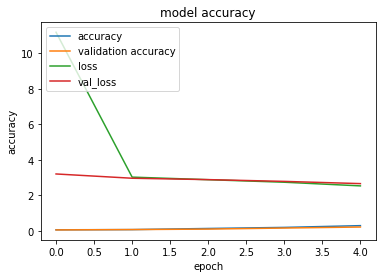

In [16]:
# plotting loss and accuracy using history obj
import matplotlib.pyplot as plt
plt.plot(historynew.history['acc'])
plt.plot(historynew.history['val_acc'])
plt.plot(historynew.history['loss'])
plt.plot(historynew.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [17]:
# predicting over the 4th sample data
print("Actual Value:",y_test[4],"Predicted Value",model2.predict_classes(X_test[[4],:]))

Actual Value: 4 Predicted Value [6]
